In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
import seaborn as sns
import yfinance as yf
%matplotlib widget
sns.set_style("darkgrid")
sns.set(font_scale=1.7)

In [2]:
def pair(buy_ticker, sell_ticker, long_financials, short_financials):

    ticker1 = yf.Ticker(buy_ticker)
    ticker2 = yf.Ticker(sell_ticker)
    beta_ticker = yf.Ticker("SPY")

    dataFrame1 = ticker1.history(
        start='2010-1-1', actions=True, rounding=True)
    dataFrame2 = ticker2.history(
        start='2010-1-1', actions=True, rounding=True)
    spy = beta_ticker.history(
        start='2010-1-1', actions=True, rounding=True)

    ratio = dataFrame1.Close / dataFrame2.Close
    spread = dataFrame1.Close - dataFrame2.Close

    chart = fig, axes = plt.subplots(3, figsize=(18, 12))
    axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=dataFrame1, x="Date", y="Close",
                 ax=axes[0], label=buy_ticker)
    sns.lineplot(data=dataFrame2, x="Date", y="Close",
                 ax=axes[0], label=sell_ticker)
    axes[1].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=ratio, ax=axes[1])
    axes[2].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=spread, ax=axes[2])
    plt.tight_layout(pad=1)

    spy_ticker1 = pd.concat(
        [spy.Close[-500::], dataFrame1.Close[-500::]], axis=1)
    spy_ticker1.columns = ["SPY", buy_ticker]
    long_data_pct = np.log(spy_ticker1/spy_ticker1.shift())
    ticker1_cov = long_data_pct.cov().iloc[0, 1]
    ticker1_var = long_data_pct["SPY"].var()
    long_beta = ticker1_cov/ticker1_var
    print("Long BETA:", np.round(long_beta, 2))

    spy_ticker2 = pd.concat(
        [spy.Close[-500::], dataFrame2.Close[-500::]], axis=1)
    spy_ticker2.columns = ["SPY", sell_ticker]
    short_data_pct = np.log(spy_ticker2/spy_ticker2.shift())
    ticker2_cov = short_data_pct.cov().iloc[0, 1]
    ticker2_var = short_data_pct["SPY"].var()
    short_beta = ticker2_cov/ticker2_var
    print("Short BETA:", np.round(short_beta, 2))

    # financials:
    print(long_financials)
    print(short_financials)

    return chart


Long BETA: 0.79
Short BETA: 0.94
LONG position EFC P/E ratio=8.19, dividend: 0.14, Gross Profit: 145320
SHORT position ABR P/E ratio=6.4, dividend: 0.119, Gross profit: 615206


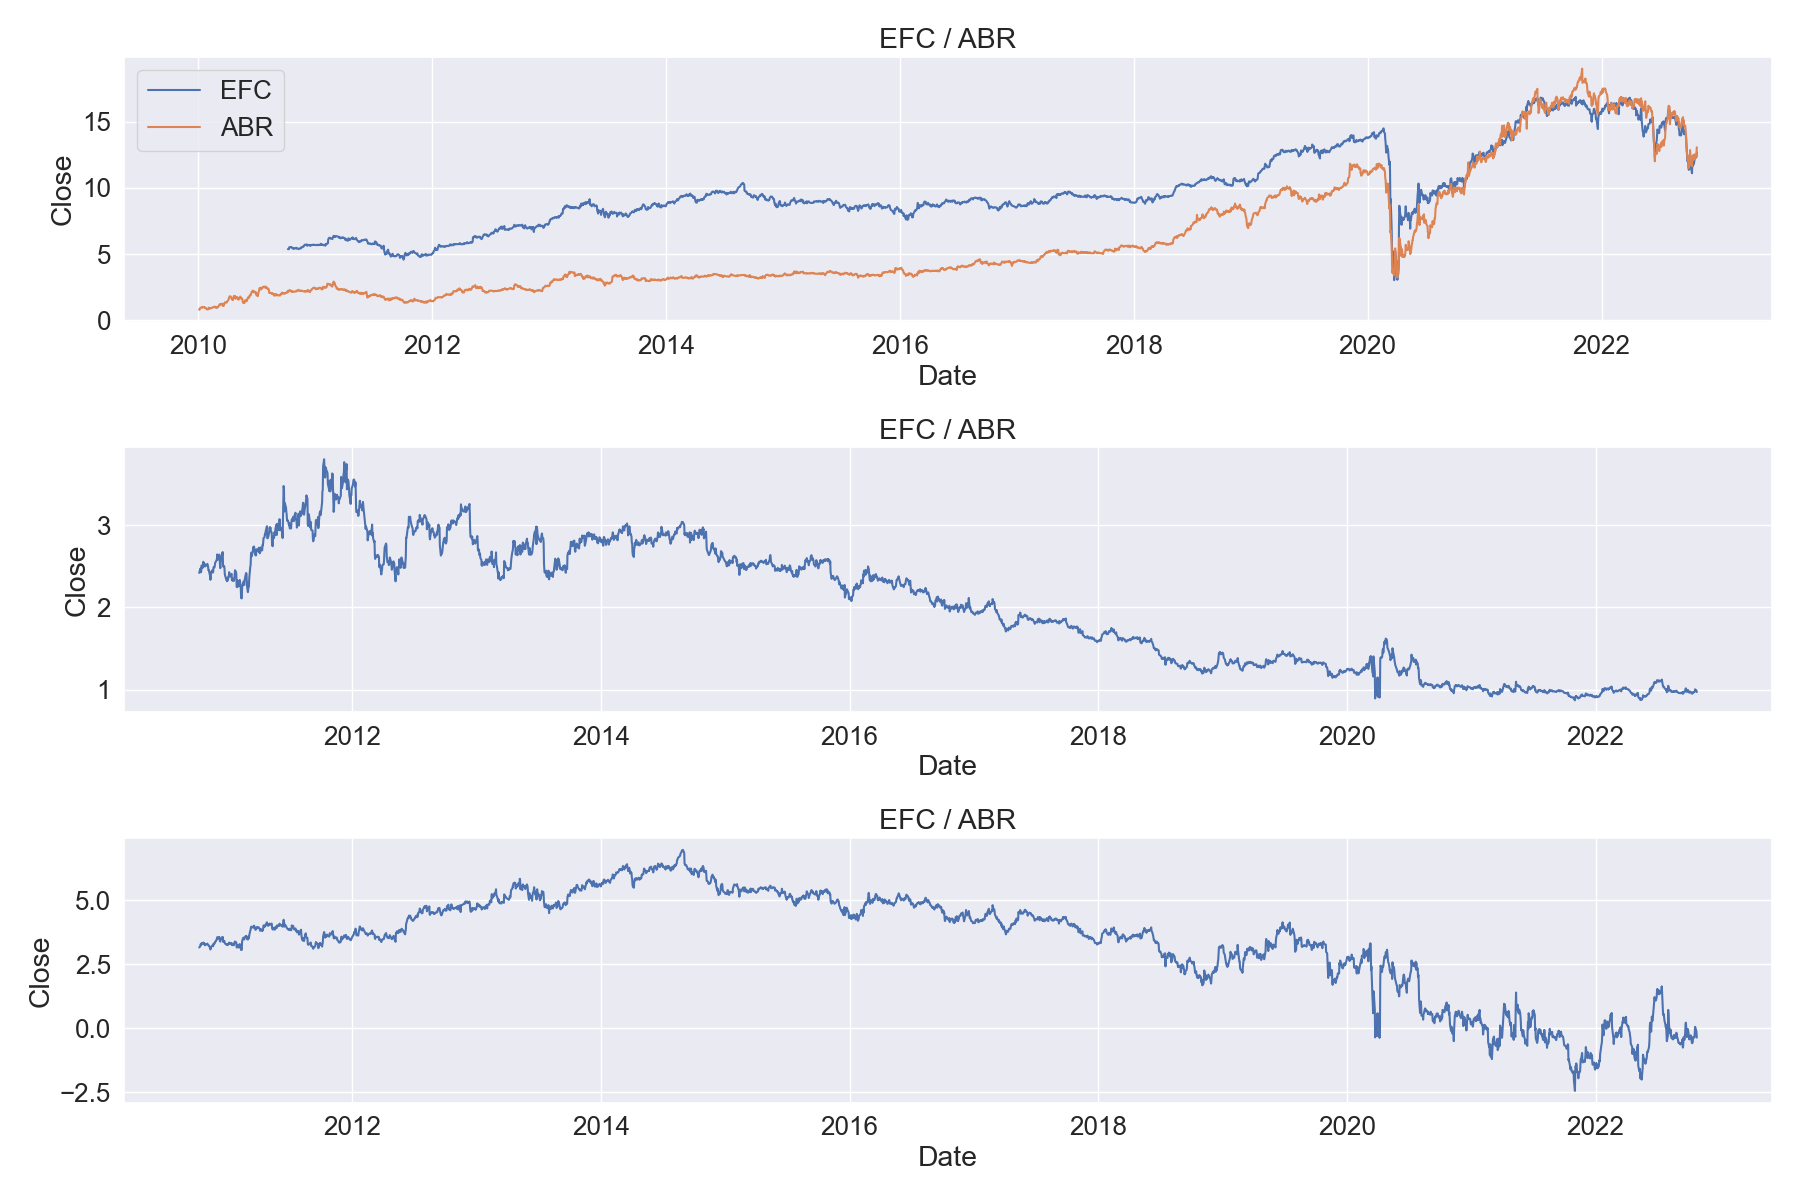

In [3]:
pair("EFC", "ABR", "LONG position EFC P/E ratio=8.19, dividend: 0.14, Gross Profit: 145320",
     "SHORT position ABR P/E ratio=6.4, dividend: 0.119, Gross profit: 615206");

Long BETA: 0.78
Short BETA: 0.98
LONG position EFC P/E ratio=8.19, dividend: 0.14, Gross Profit: 145320
SHORT position ACRE P/E ratio=11, dividend: 0.11, Gross profit: 100394


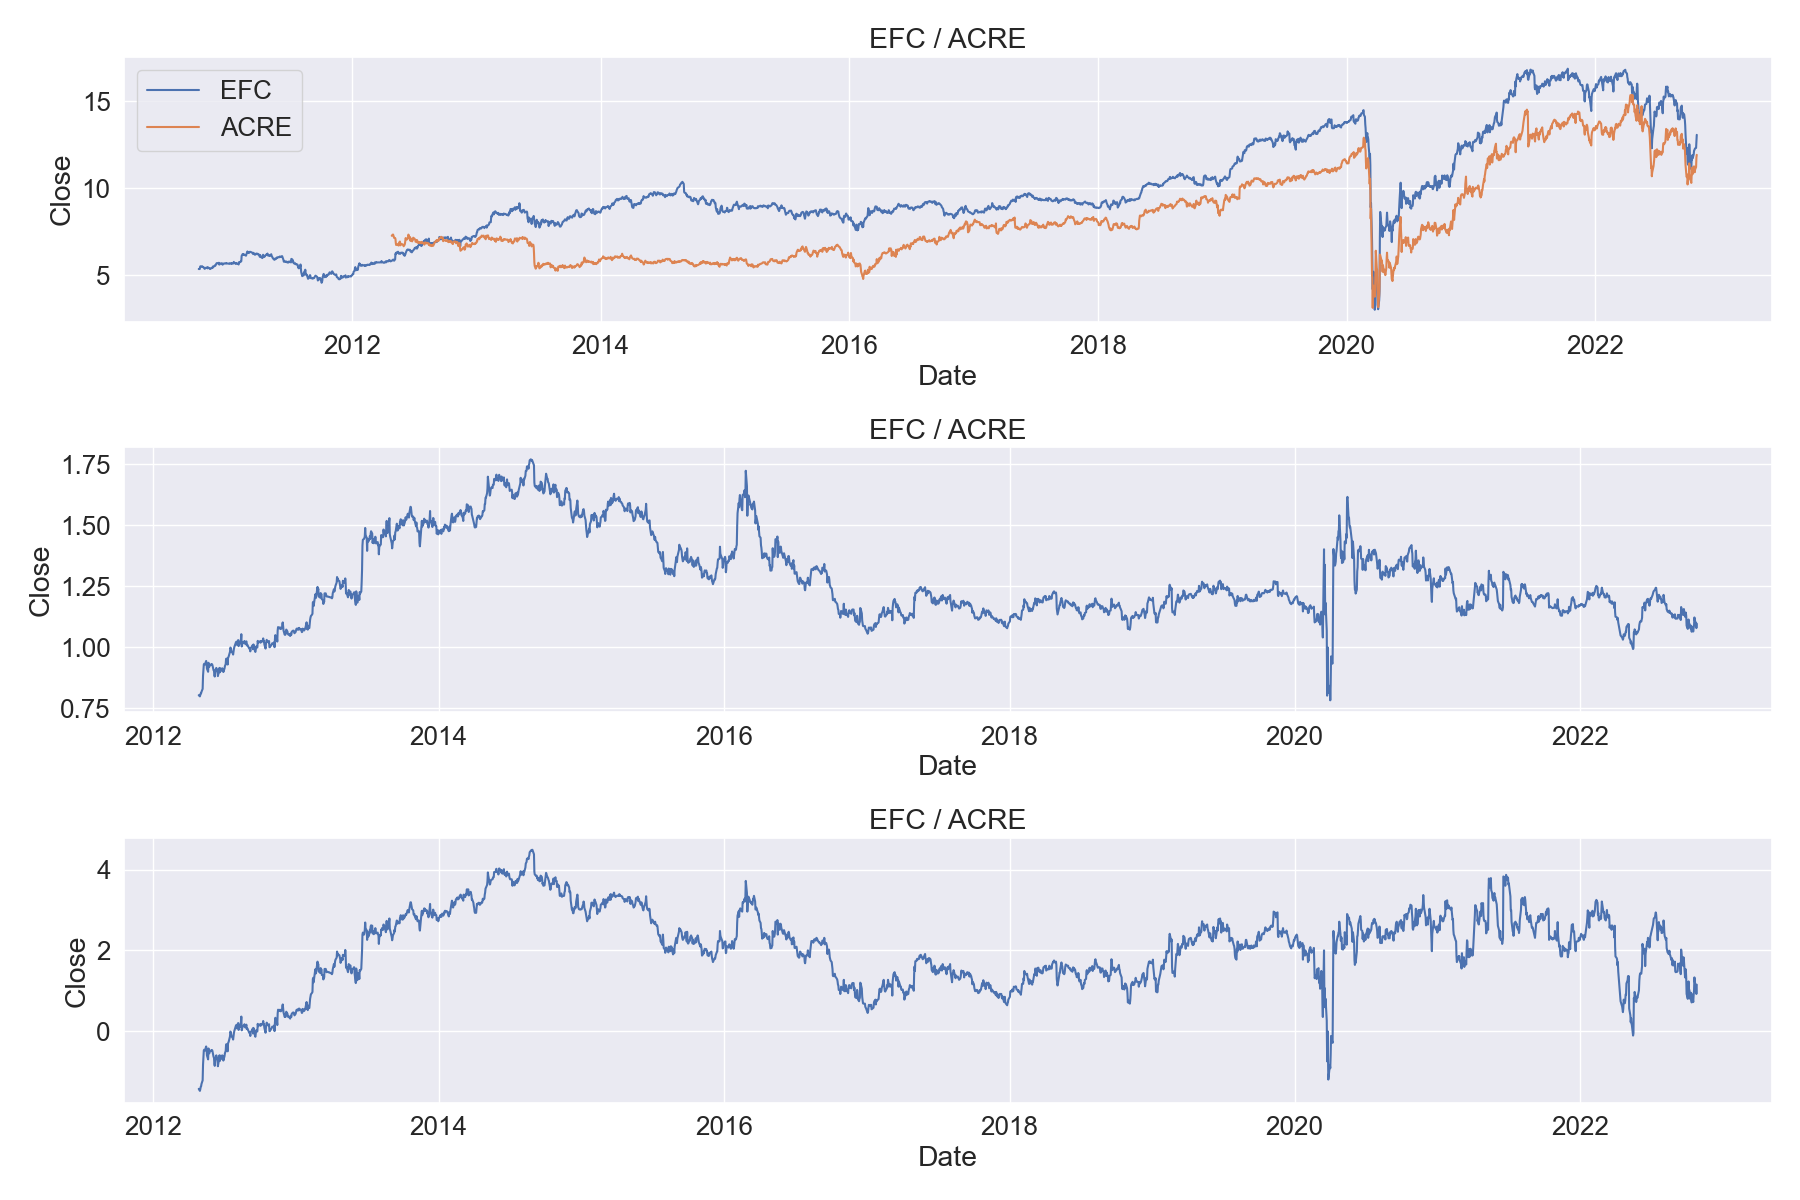

In [17]:
pair("EFC", "ACRE", "LONG position EFC P/E ratio=8.19, dividend: 0.14, Gross Profit: 145320",
     "SHORT position ACRE P/E ratio=11, dividend: 0.11, Gross profit: 100394");

Long BETA: 0.79
Short BETA: 0.95
LONG position EFC P/E ratio=8.19, dividend: 0.14, Gross Profit: 145320
SHORT position BDN P/E ratio=37.94, dividend: 0.117, Gross profit: 269536


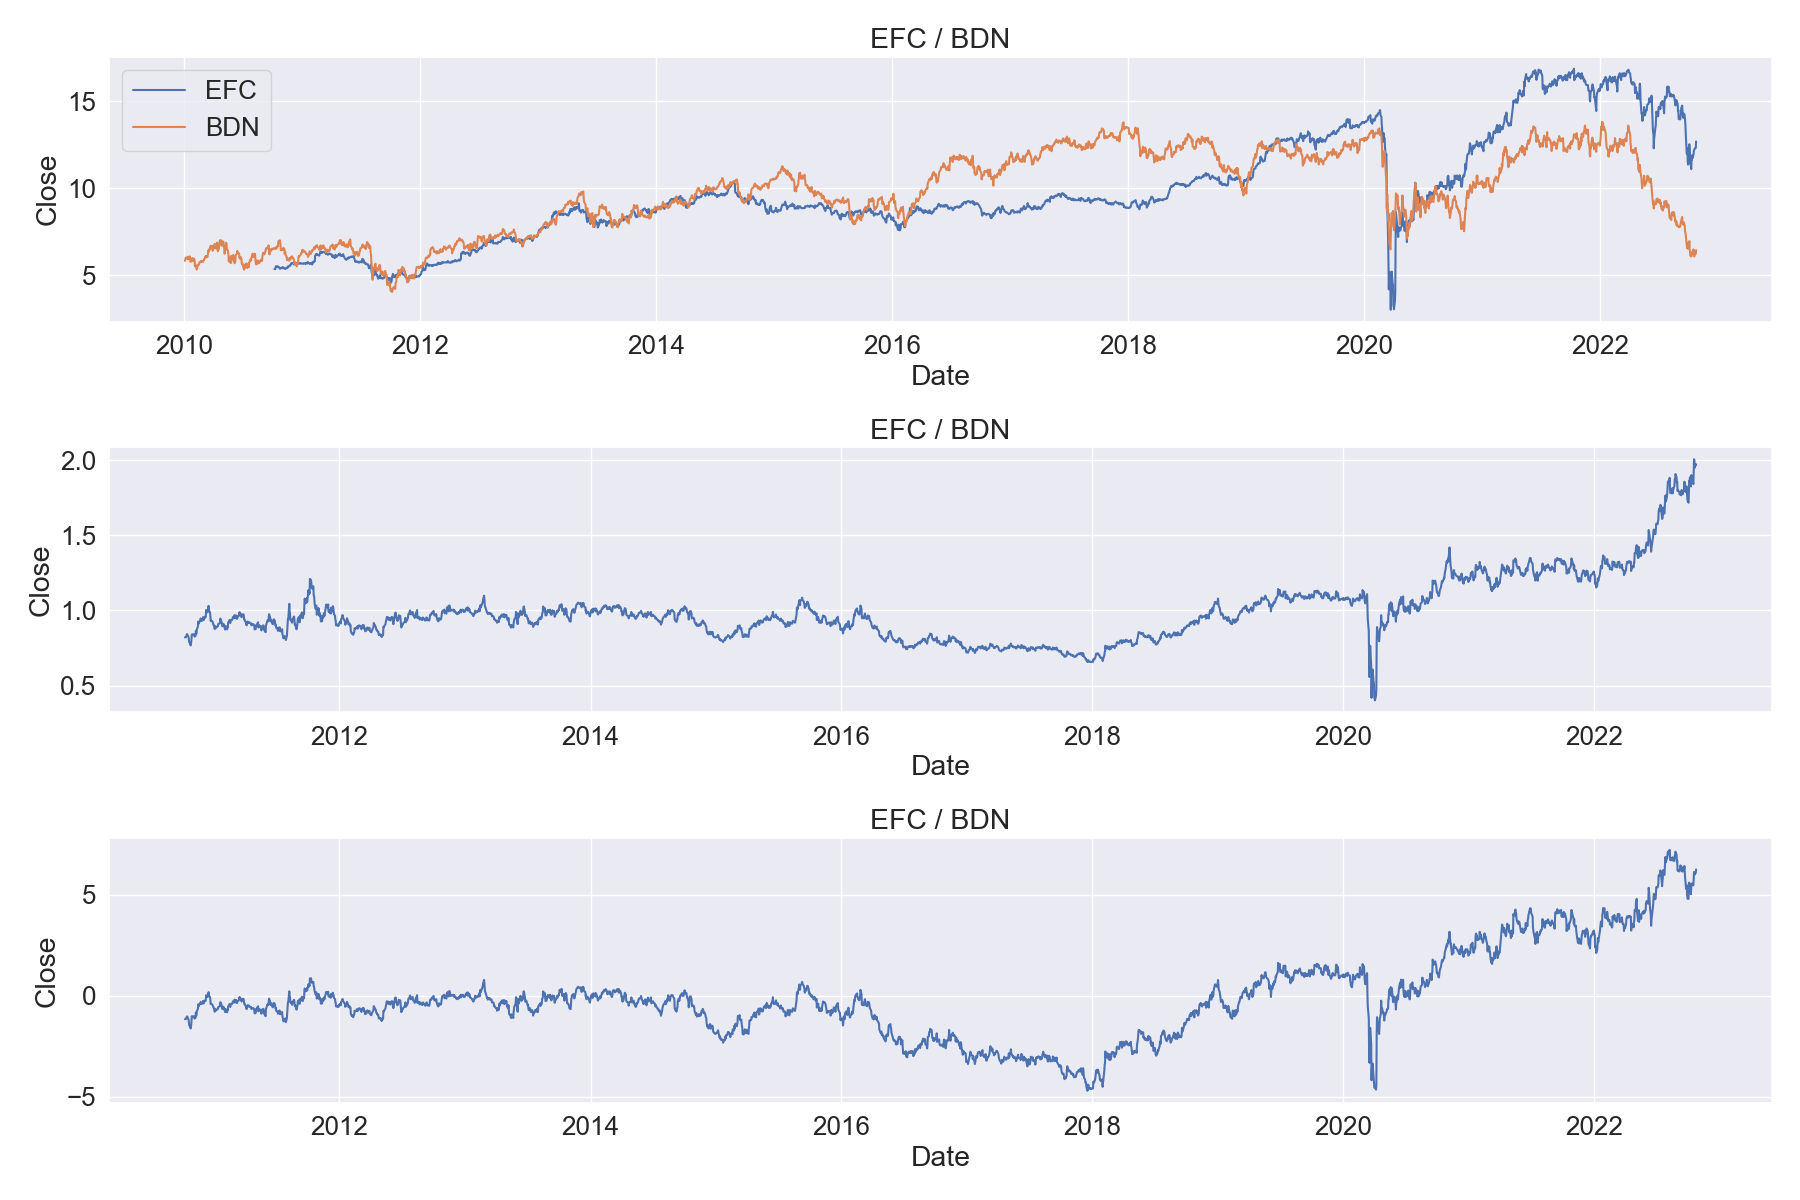

In [11]:
pair("EFC", "BDN", "LONG position EFC P/E ratio=8.19, dividend: 0.14, Gross Profit: 145320",
     "SHORT position BDN P/E ratio=37.94, dividend: 0.117, Gross profit: 269536");

Long BETA: 0.79
Short BETA: 1.81
LONG position EFC P/E ratio=8.19, dividend: 0.14, Gross Profit: 145320
SHORT position CDXS P/E ratio=None, dividend: None, Gross profit: 26626


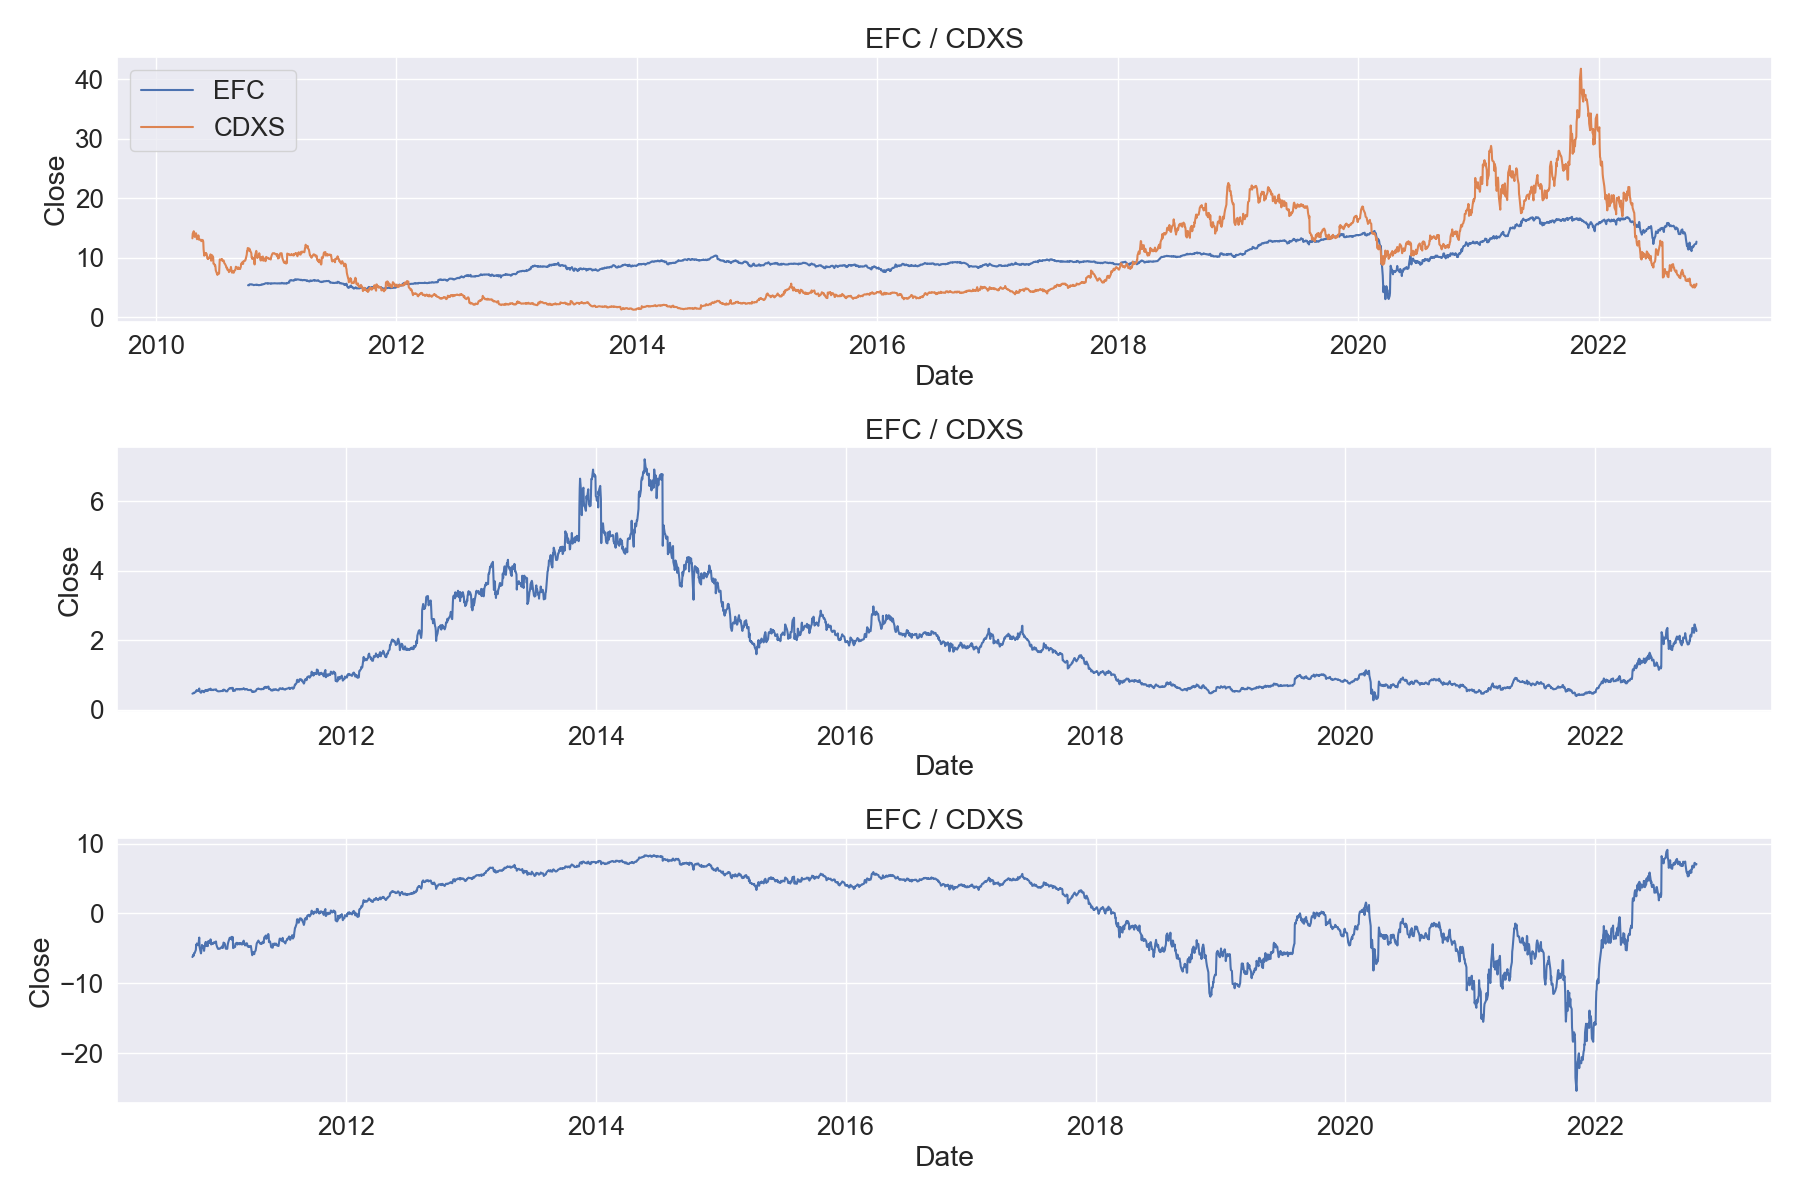

In [13]:
pair("EFC", "CDXS", "LONG position EFC P/E ratio=8.19, dividend: 0.14, Gross Profit: 145320",
     "SHORT position CDXS P/E ratio=None, dividend: None, Gross profit: 26626");

Long BETA: 1.02
Short BETA: 1.02
LONG position EGY P/E ratio=3.31, dividend: 0.023, Gross Profit: 114920
SHORT position CRK P/E ratio=14.68, dividend: None, Gross profit: 1568061


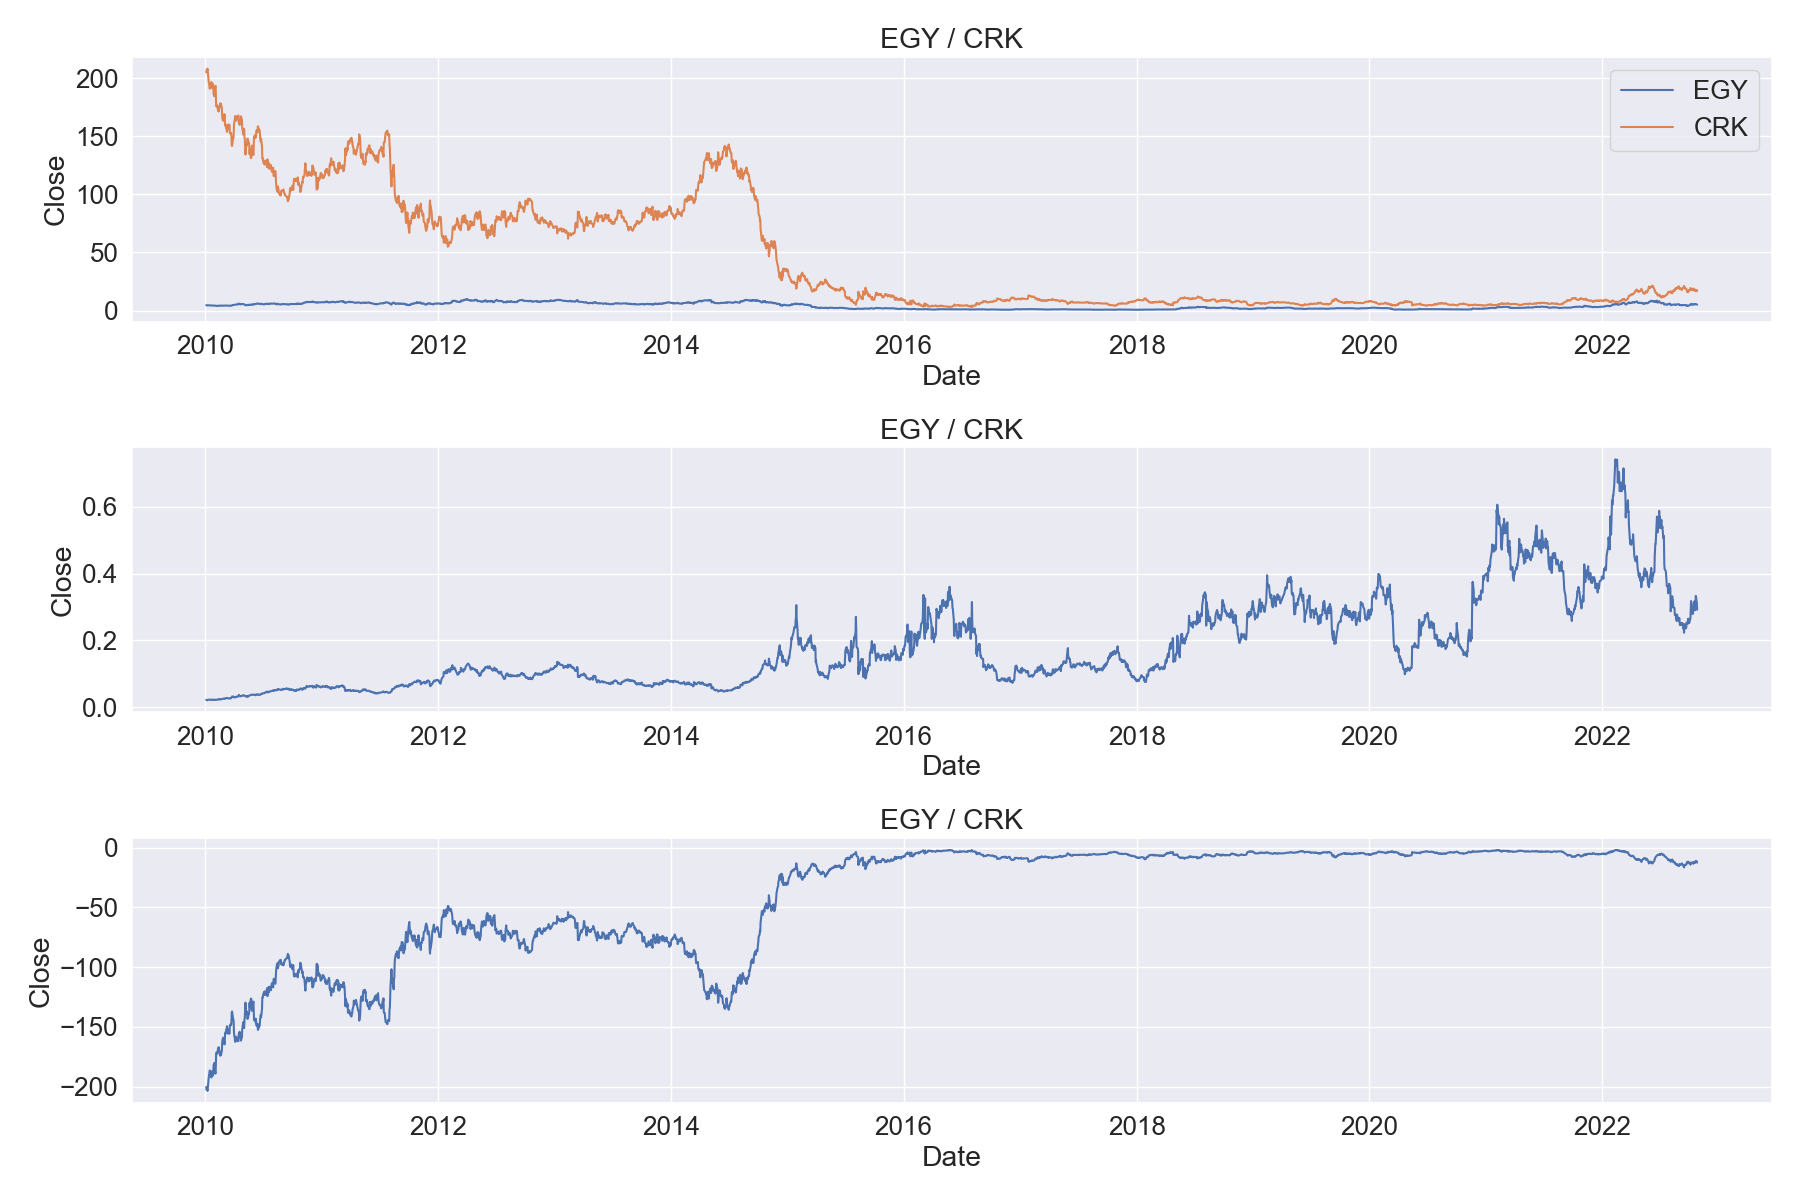

In [6]:
pair("EGY", "CRK", "LONG position EGY P/E ratio=3.31, dividend: 0.023, Gross Profit: 114920",
     "SHORT position CRK P/E ratio=14.68, dividend: None, Gross profit: 1568061");

Long BETA: 1.18
Short BETA: 0.72
LONG position ENLC P/E ratio=30.81, dividend: 0.039, Gross Profit: 1655100
SHORT position CXW P/E ratio=13.53, dividend: None, Gross profit: 527985


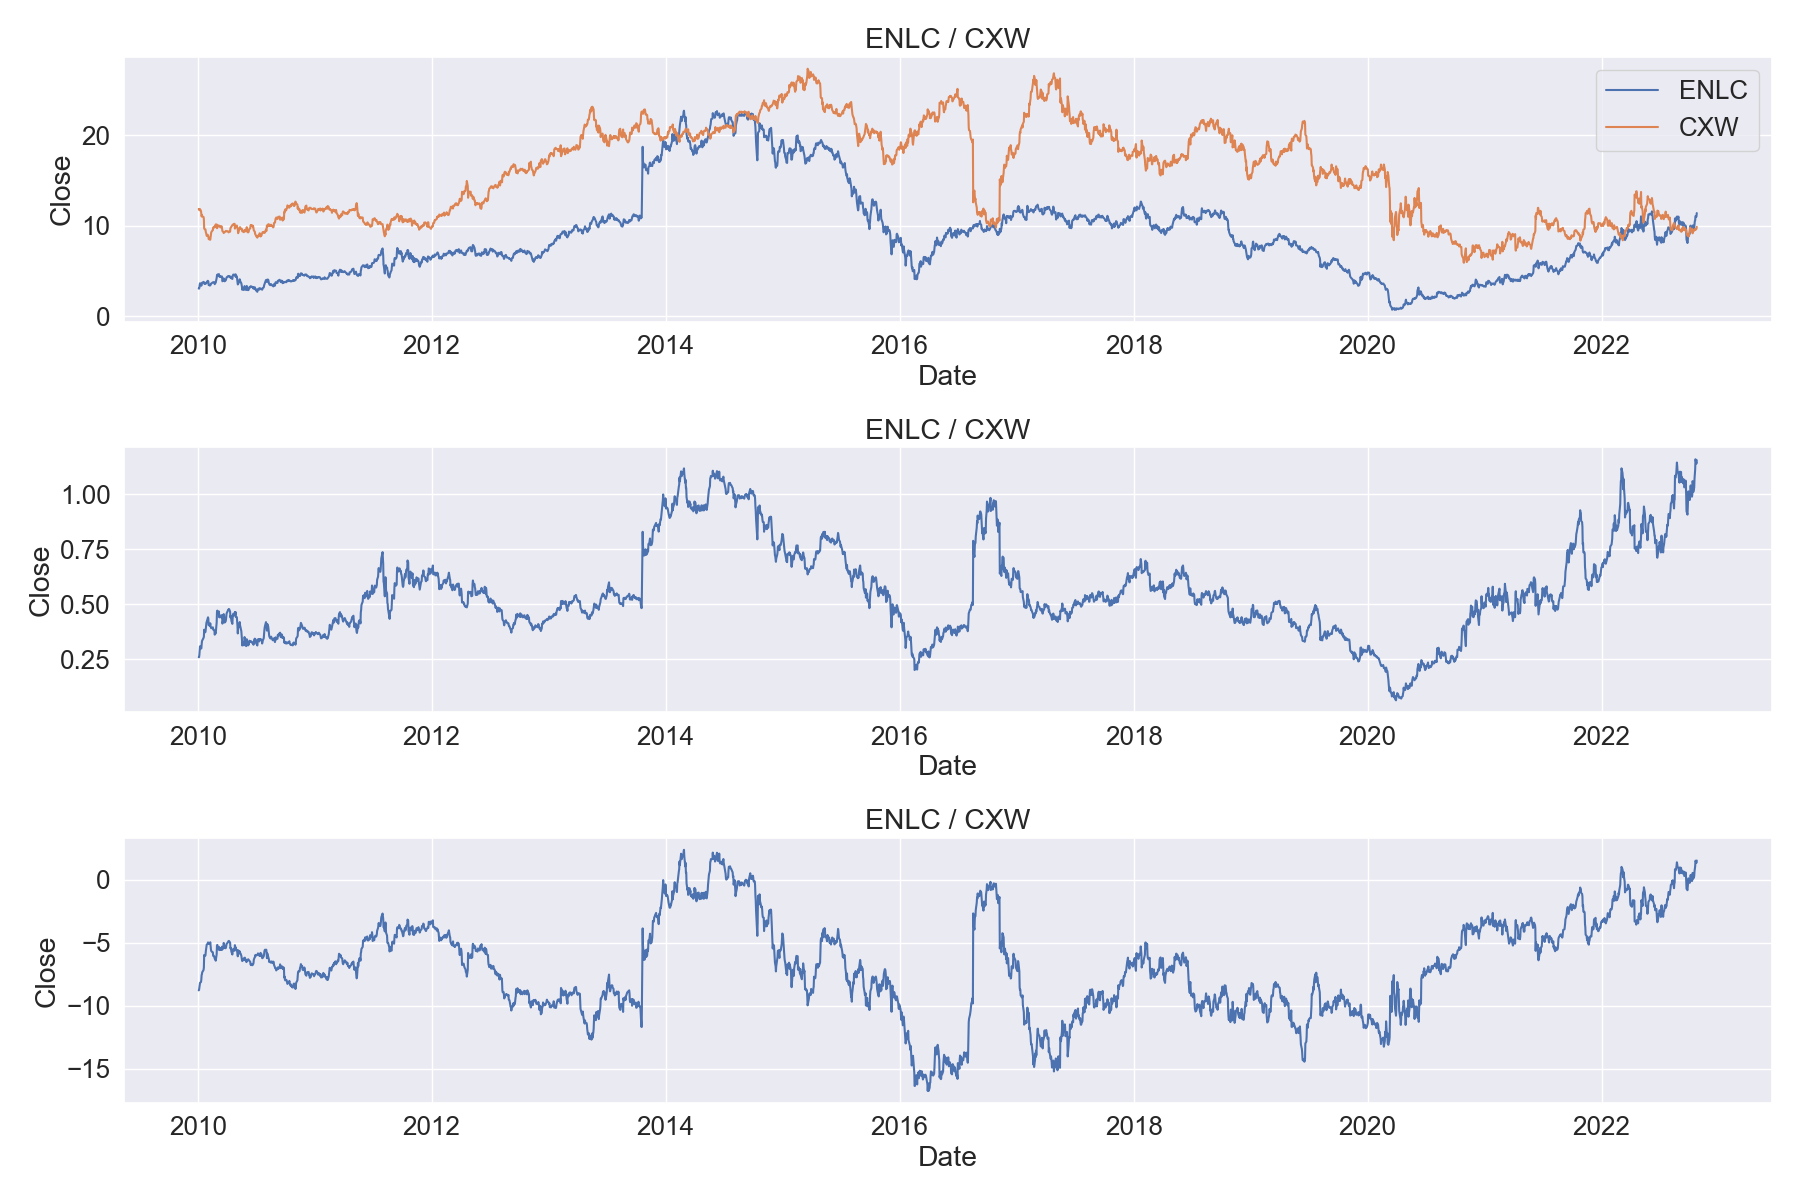

In [8]:
pair("ENLC", "CXW", "LONG position ENLC P/E ratio=30.81, dividend: 0.039, Gross Profit: 1655100",
     "SHORT position CXW P/E ratio=13.53, dividend: None, Gross profit: 527985");

Long BETA: 1.18
Short BETA: 1.42
LONG position ENLC P/E ratio=30.81, dividend: 0.039, Gross Profit: 1655100
SHORT position DISH P/E ratio=4.55, dividend: None, Gross profit: 6142823


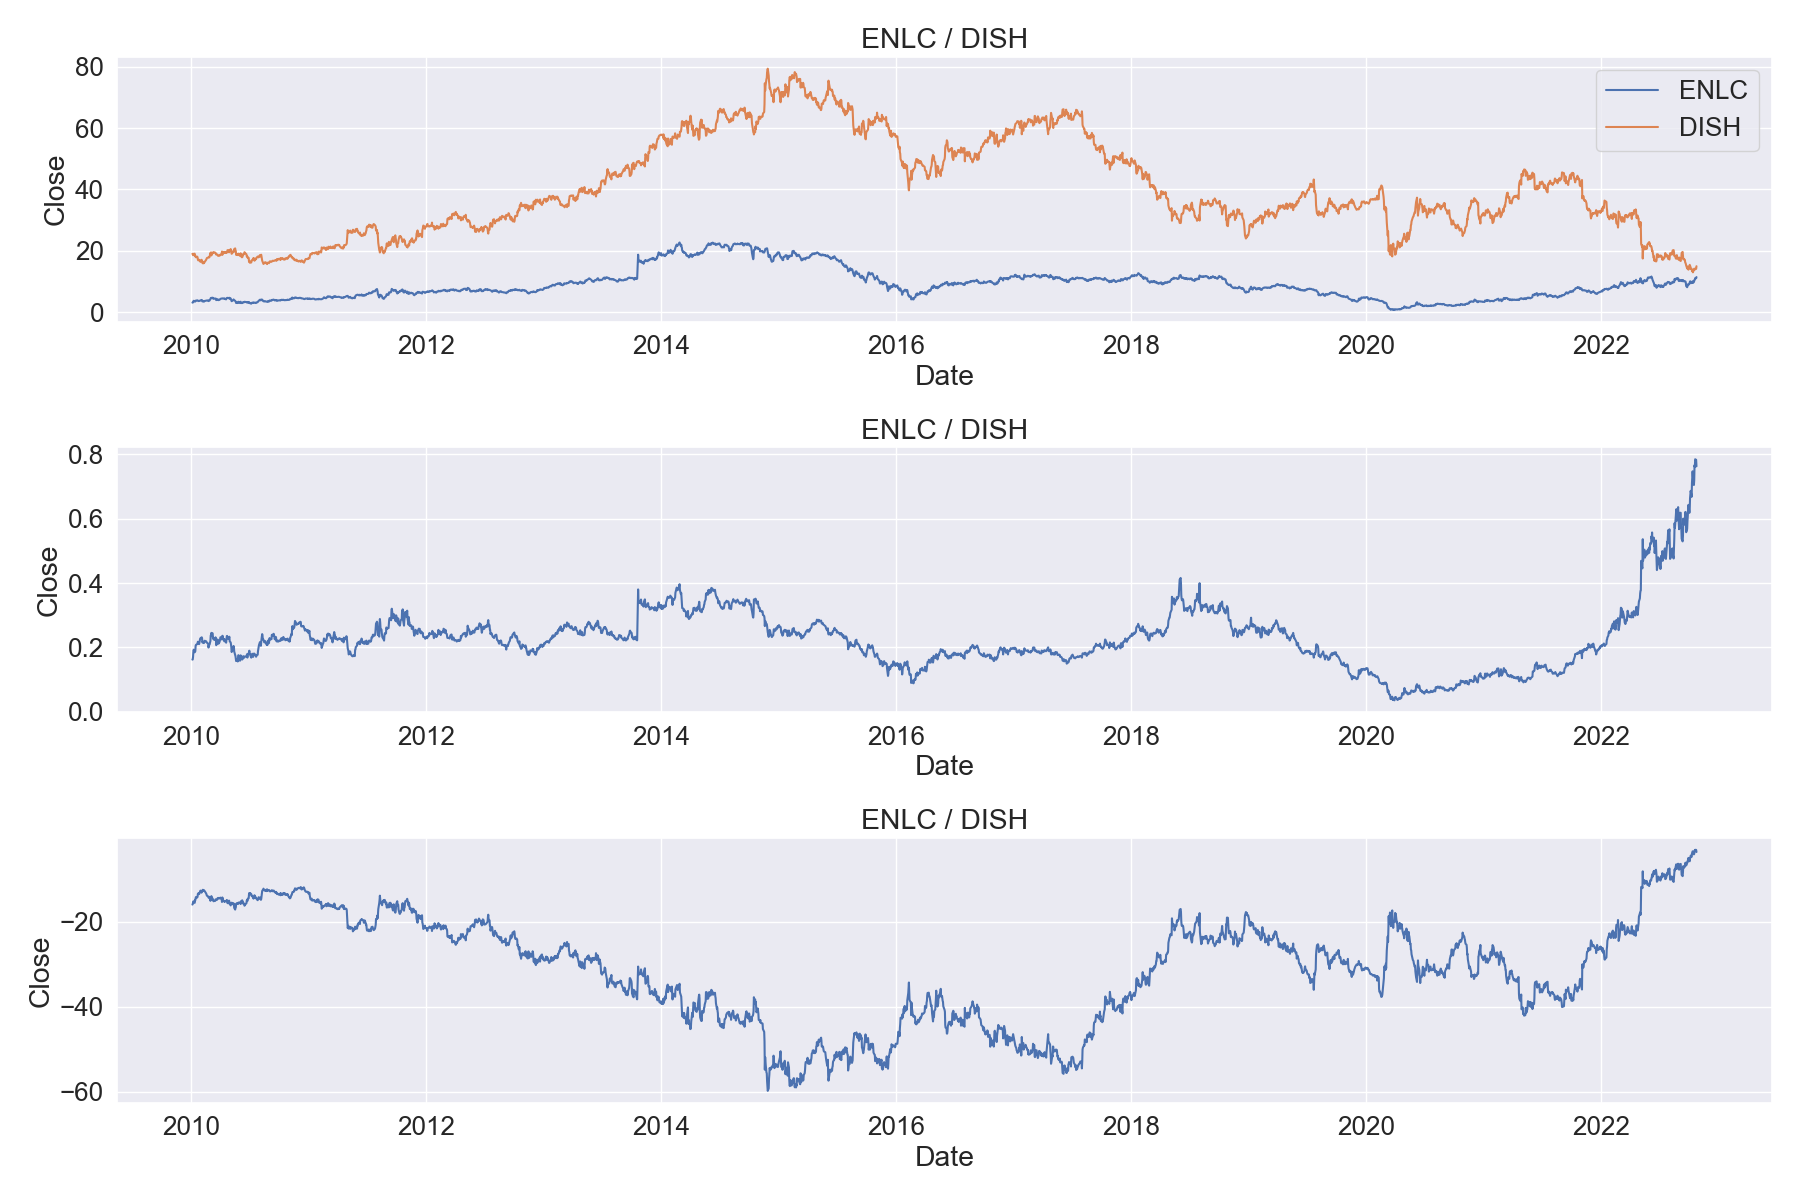

In [10]:
pair("ENLC", "DISH", "LONG position ENLC P/E ratio=30.81, dividend: 0.039, Gross Profit: 1655100",
     "SHORT position DISH P/E ratio=4.55, dividend: None, Gross profit: 6142823");

Long BETA: 0.83
Short BETA: 1.4
LONG position ET P/E ratio=9.63, dividend: 0.076, Gross Profit: 13585000
SHORT position CNK P/E ratio=None, dividend: None, Gross profit: 717054


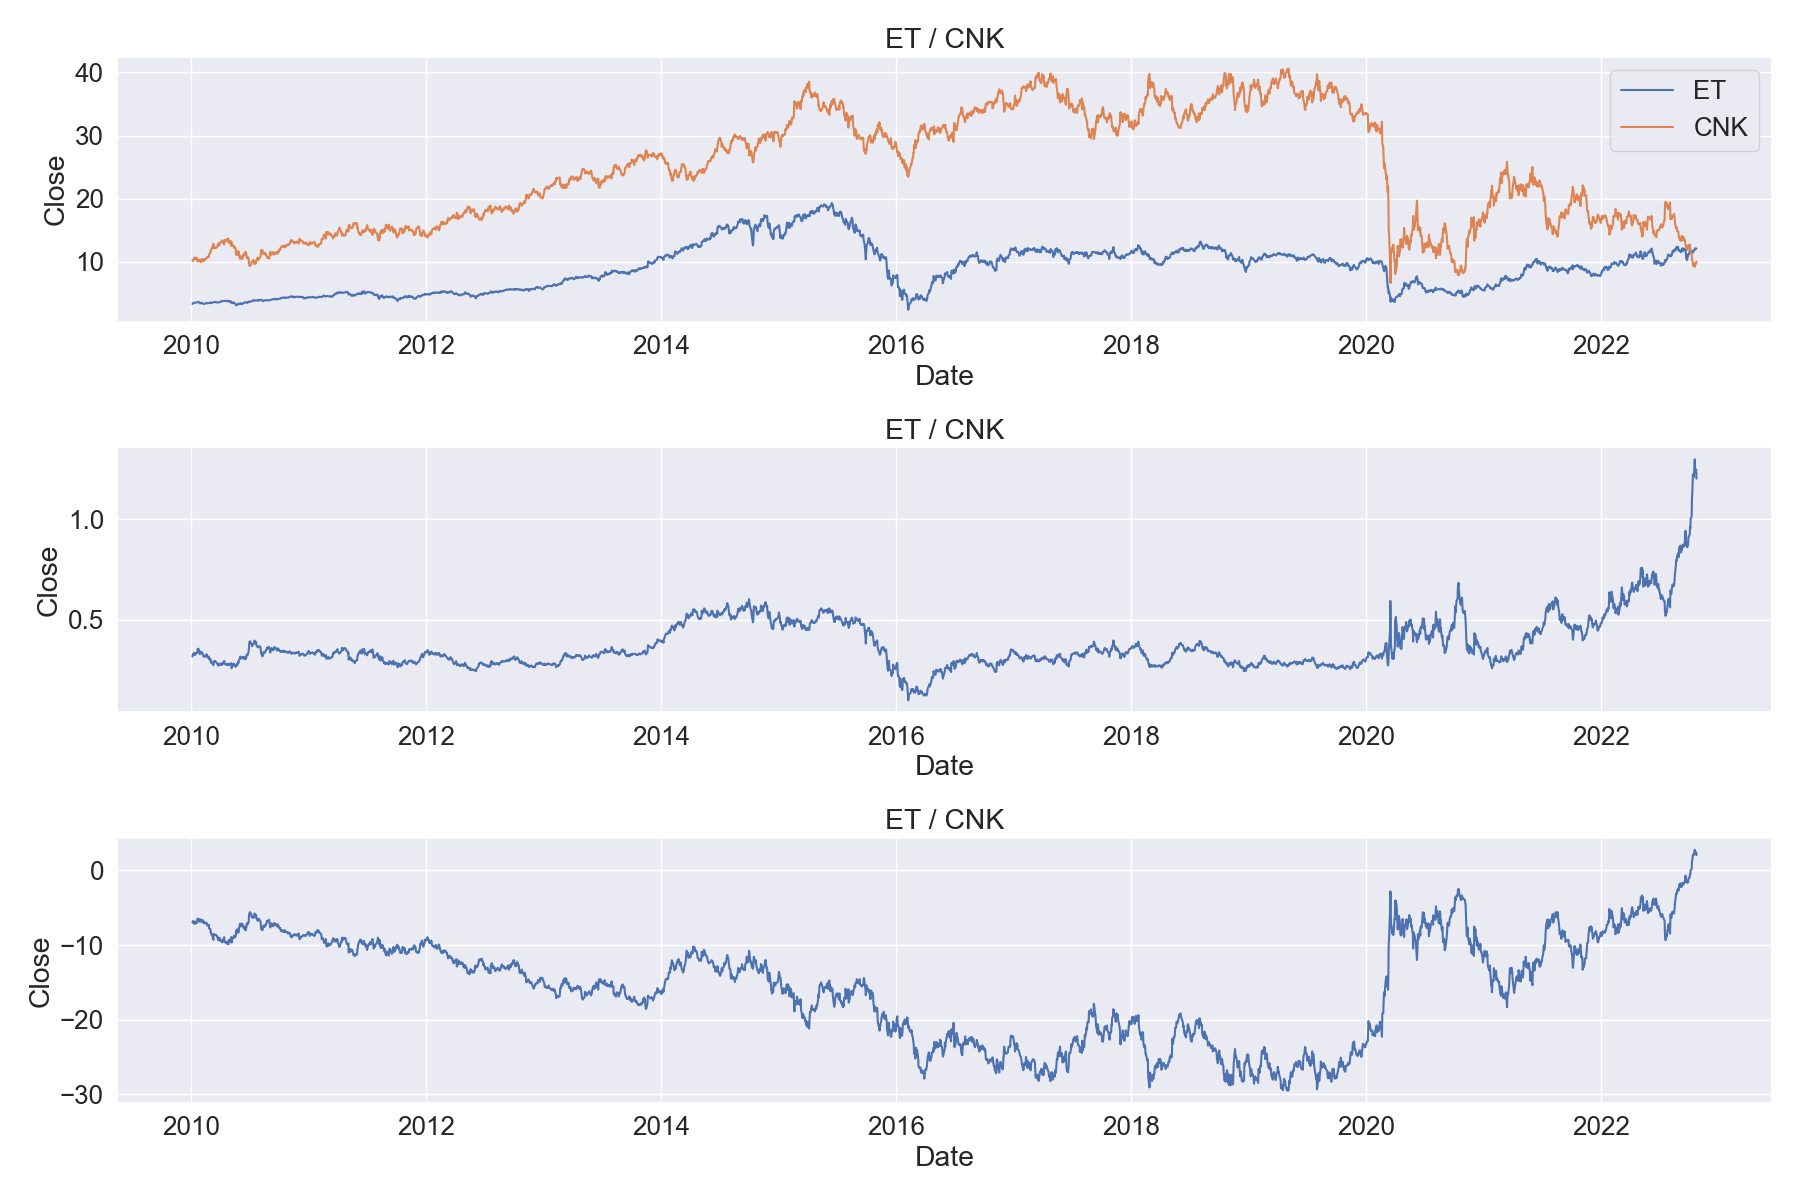

In [12]:
pair("ET", "CNK", "LONG position ET P/E ratio=9.63, dividend: 0.076, Gross Profit: 13585000",
     "SHORT position CNK P/E ratio=None, dividend: None, Gross profit: 717054");

Long BETA: 0.83
Short BETA: 1.42
LONG position ET P/E ratio=9.63, dividend: 0.076, Gross Profit: 13585000
SHORT position DISH P/E ratio=4.55, dividend: None, Gross profit: 6142823


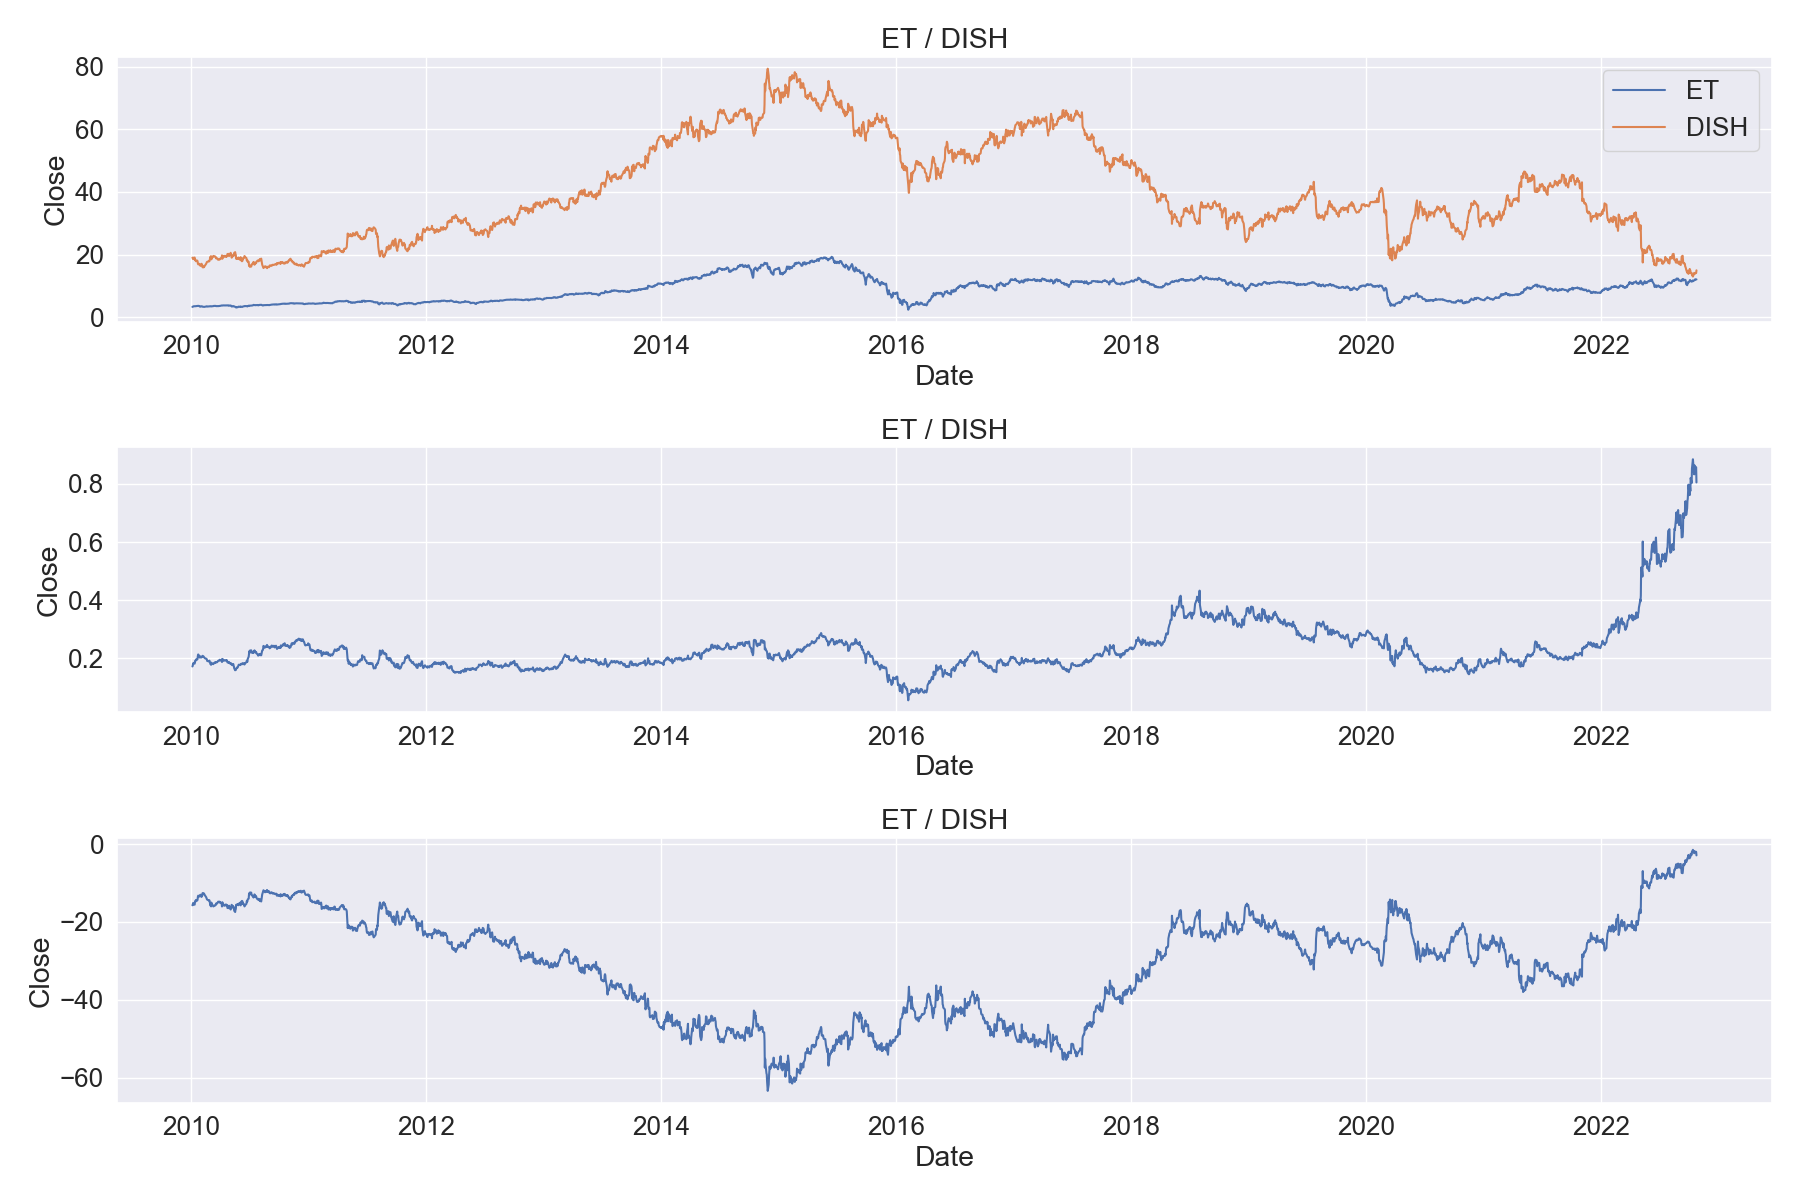

In [14]:
pair("ET", "DISH", "LONG position ET P/E ratio=9.63, dividend: 0.076, Gross Profit: 13585000",
     "SHORT position DISH P/E ratio=4.55, dividend: None, Gross profit: 6142823");

Long BETA: 0.83
Short BETA: 1.44
LONG position ET P/E ratio=9.63, dividend: 0.076, Gross Profit: 13585000
SHORT position DRH P/E ratio=38.12, dividend: 0.013, Gross profit: 105428


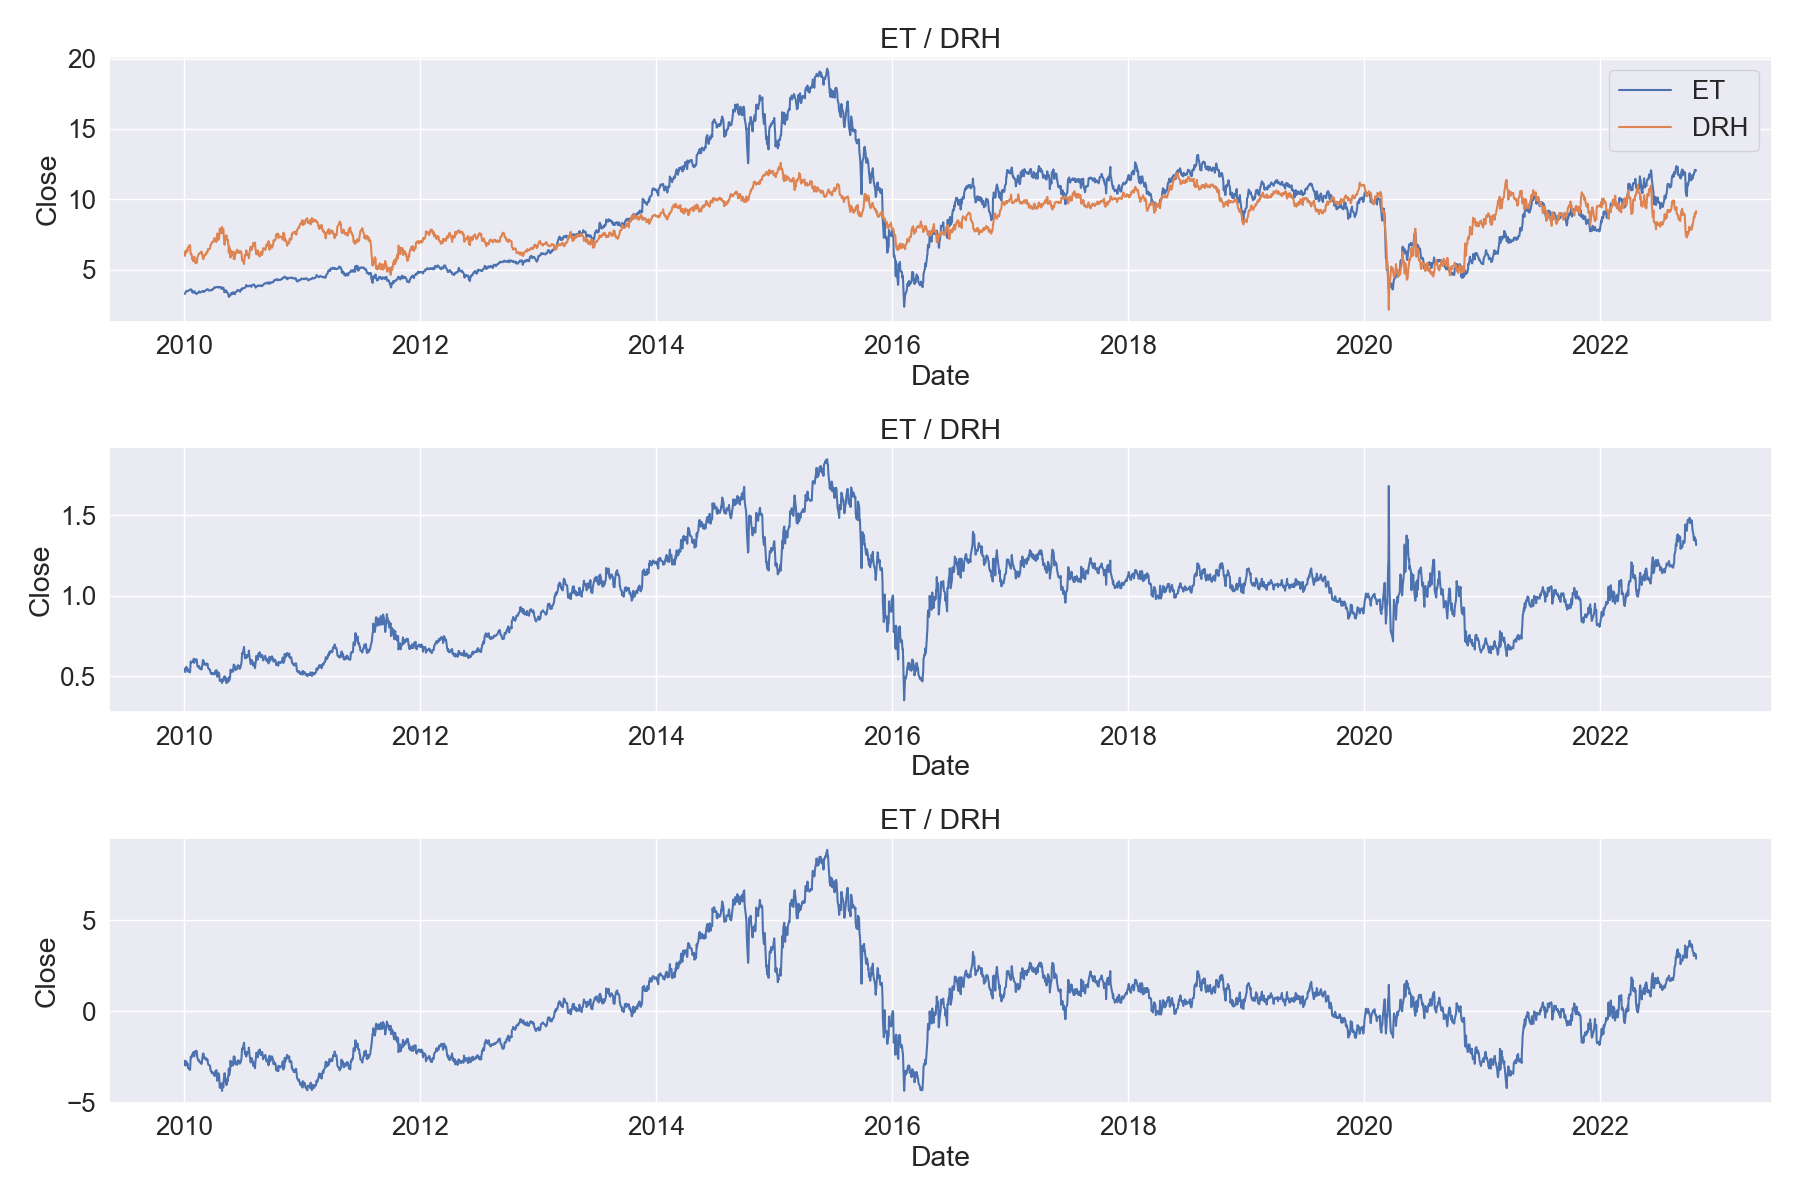

In [15]:
pair("ET", "DRH", "LONG position ET P/E ratio=9.63, dividend: 0.076, Gross Profit: 13585000",
     "SHORT position DRH P/E ratio=38.12, dividend: 0.013, Gross profit: 105428");